In [1]:
#princess.pyをダウンロードしてから以下を実行してください。
from google.colab import files
uploaded = files.upload()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import chainer.optimizers as Opt
import chainer.functions as F
import chainer.links as L
from chainer import Variable,Chain,config

import princess as ohm

In [2]:
import pandas_datareader.data as web
import datetime as dt

In [3]:
start = dt.date(2005,1,1)
end = dt.date(2007,12,31)
web_data= web.DataReader("AMZN","yahoo",start,end)

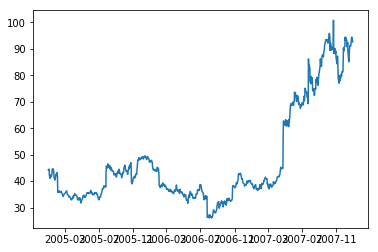

In [4]:
plt.plot(web_data["Close"])
plt.show()

In [5]:
value_data = web_data['Close']
M = len(value_data)

In [6]:
N = 2

xdata = []
tdata = []
for k in range(N,M):
    xdata.append(value_data[k-N:k])
    tdata.append(value_data[k])
xdata = np.array(xdata).astype(np.float32)
tdata = np.array(tdata).reshape(len(tdata),1).astype(np.float32)

In [7]:
D,N = xdata.shape
print(D,N)

753 2


In [8]:
C = 1
H1 = 5
H2 = 5
H3 = 5
layers = {}
layers["l1"] = L.Linear(N,H1)
layers["l2"] = L.Linear(H1,H2)
layers["l3"] = L.Linear(H2,H3)
layers["l4"]=L.Linear(H3,C)
layers["bnorm1"] = L.BatchNormalization(H1)
layers["bnorm2"] = L.BatchNormalization(H2)
layers["bnorm3"] = L.BatchNormalization(H3)
NN = Chain(**layers)

def model(x):
    h = NN.l1(x)
    h = F.relu(h)
    h = NN.bnorm1(h)
    h = NN.l2(h)
    h = F.relu(h)
    h = NN.bnorm2(h)
    h = NN.l3(h)
    h = F.relu(h)
    h = NN.bnorm3(h)
    y = NN.l4(h)
    return y

In [9]:
optNN = Opt.MomentumSGD()
optNN.setup(NN)

In [10]:
train_loss = []
test_loss = []

In [11]:
Dtrain = D//2
xtrain,xtest,ttrain,ttest = ohm.data_divide(Dtrain,D,xdata,tdata,'off')
data = [xtrain,xtest,ttrain,ttest]
result = [train_loss,test_loss]

In [12]:
ohm.learning_regression(model,optNN,data,result,2000)

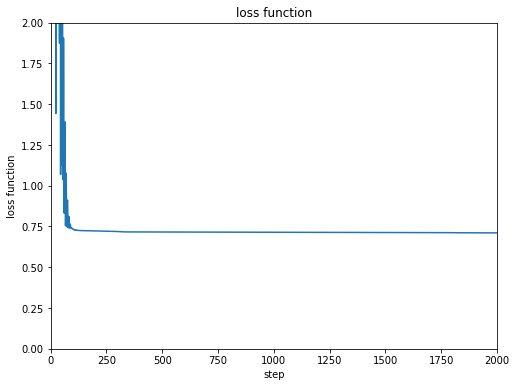

In [13]:
ohm.plot_result2(result[0],result[1],"loss function","step","loss function",0.0,2.0)

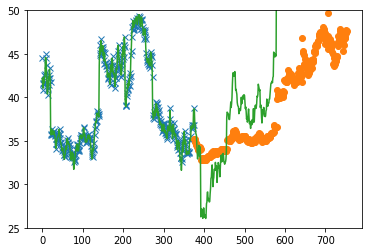

In [14]:
ytrain = model(xtrain).data
ytest = model(xtest).data
time_data = np.arange(M-N)
plt.plot(time_data[0:Dtrain],ytrain,marker="x",linestyle="None")
plt.plot(time_data[Dtrain:D],ytest,marker="o",linestyle="None")
plt.plot(time_data[0:D-N],value_data[N:D])
plt.ylim([25,50])
plt.show()